# Titanic classification

In [1]:
using Plots
using DataFrames
using CSV
using Gadfly
using Statistics: mean
using Pkg
Pkg.activate(".")
using MyClassification

  Activating project at `c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\examples`

## Train data

In [2]:
train_data = CSV.read("../data/titanic/train.csv", DataFrame)

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


In [3]:
rows, cols = size(train_data)
println("Training dataframe has $rows rows and $cols columns")

Training dataframe has 891 rows and 12 columns


In [4]:
describe(train_data)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.6991,0.42,28.0,80.0,177,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


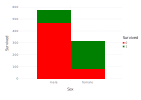

In [5]:
Gadfly.plot(train_data, x="Sex", y="Survived", color="Survived", Gadfly.Geom.histogram(position=:stack), Scale.color_discrete_manual("red","green"))

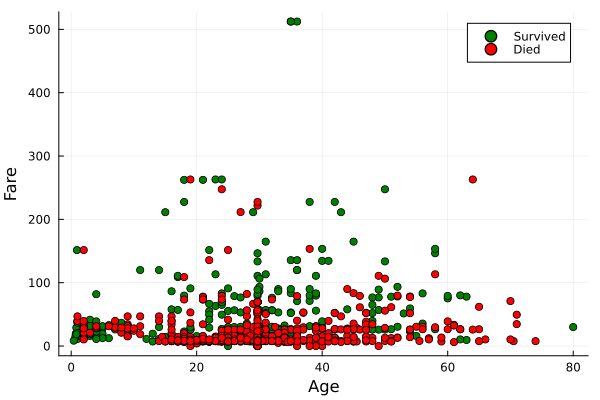

In [6]:
train_data[!, :Age] = notdefined_replacement.(train_data[!, :Age], round(mean(skipmissing(train_data[!, :Age])), digits=1))
train_data[!, :Fare] = notdefined_replacement.(train_data[!, :Fare], round(mean(skipmissing(train_data[!, :Fare])), digits=1))

train_data_died = train_data[train_data[!, :Survived] .== 0, :]
train_data_survived = train_data[train_data[!, :Survived] .== 1, :]

Plots.scatter(train_data_survived[!, :Age], train_data_survived[!, :Fare], mc=:green, labels="Survived", xlabel="Age", ylabel="Fare")
Plots.scatter!(train_data_died[!, :Age], train_data_died[!, :Fare], mc=:red, labels="Died")

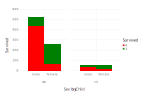

In [7]:
train_data[!, :Child] .= 1
train_data[train_data[!, :Age] .>= 18, :Child] .= 0

Gadfly.plot(train_data, xgroup="Child", x="Sex", y="Survived", color="Survived", 
Gadfly.Geom.subplot_grid(Gadfly.Geom.histogram(position=:stack)), Gadfly.Scale.color_discrete_manual("red","green"))

## KNN

┌ Info: K value: 1
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6052631578947368
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 2
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.631578947368421
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 3
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6220095693779905
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 4
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.638755980861244
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 5
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.645933014354067
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 6
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6507177033492823
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 7
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6507177033492823
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 8
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6674641148325359
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 9
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6602870813397129
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 10
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.65311004784689
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 11
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6555023923444976
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 12
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6578947368421053
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 13
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6483253588516746
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 14
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6483253588516746
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 15
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6435406698564593
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 16
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6483253588516746
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 17
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.645933014354067
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 18
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6483253588516746
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 19
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6507177033492823
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 20
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6507177033492823
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


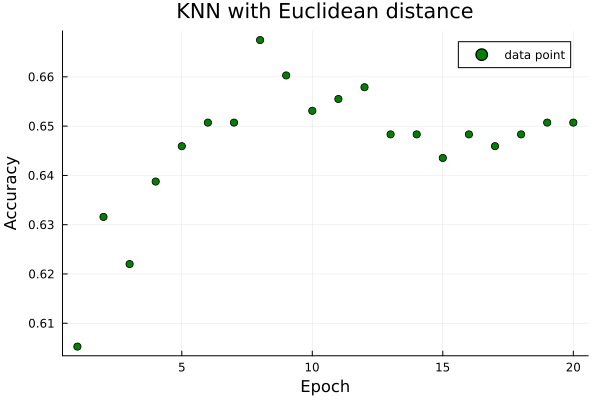

In [8]:
#Run KNN classification using multiple K values and euclidean distance function 
k_values = Vector{Int64}(undef, 20)
accs_values = Vector{Float64}(undef, 20)

for cur_k in 1:20
    _, acc_val = predict(cur_k, "euclidean")
    k_values[cur_k] = cur_k
    accs_values[cur_k] = acc_val
end

Plots.scatter(k_values, accs_values, xticks=:all, mc=:green, labels="data point", xlabel="Epoch", ylabel="Accuracy", title="KNN with Euclidean distance")

┌ Info: K value: 1
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6435406698564593
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 2
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6363636363636364
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 3
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6220095693779905
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 4
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6602870813397129
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 5
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6674641148325359
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 6
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6626794258373205
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 7
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6555023923444976
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 8
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6722488038277512
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 9
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6698564593301436
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 10
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6650717703349283
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 11
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6722488038277512
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 12
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6698564593301436
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 13
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6602870813397129
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 14
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6770334928229665
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 15
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6746411483253588
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 16
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6722488038277512
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 17
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6650717703349283
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 18
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6674641148325359
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 19
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.65311004784689
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 20
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6650717703349283
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


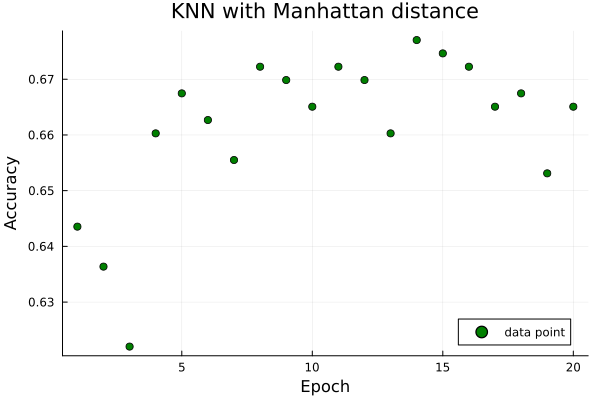

In [9]:
#Run KNN classification using multiple K values and manhattan distance function 
k_values = Vector{Int64}(undef, 20)
accs_values = Vector{Float64}(undef, 20)

for cur_k in 1:20
    _, acc_val = predict(cur_k, "manhattan")
    k_values[cur_k] = cur_k
    accs_values[cur_k] = acc_val
end

Plots.scatter(k_values, accs_values, xticks=:all, mc=:green, labels="data point", xlabel="Epoch", ylabel="Accuracy", title="KNN with Manhattan distance")

┌ Info: K value: 1
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.5885167464114832
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 2
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6148325358851675
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 3
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6244019138755981
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 4
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6028708133971292
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 5
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6124401913875598
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 6
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.631578947368421
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 7
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6363636363636364
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 8
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.65311004784689
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 9
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6507177033492823
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 10
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6602870813397129
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 11
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6411483253588517
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 12
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.65311004784689
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 13
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.638755980861244
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 14
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6650717703349283
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 15
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6626794258373205
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 16
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6626794258373205
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 17
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6650717703349283
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 18
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6650717703349283
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61
┌ Info: K value: 19
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45


┌ Info: Accuracy: 0.6626794258373205
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


┌ Info: K value: 20
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:45
┌ Info: Accuracy: 0.6674641148325359
└ @ MyClassification c:\Lamosst\FEL\Paty_semestr\JUL\Final_Project\Projekt_lamossta\src\knn.jl:61


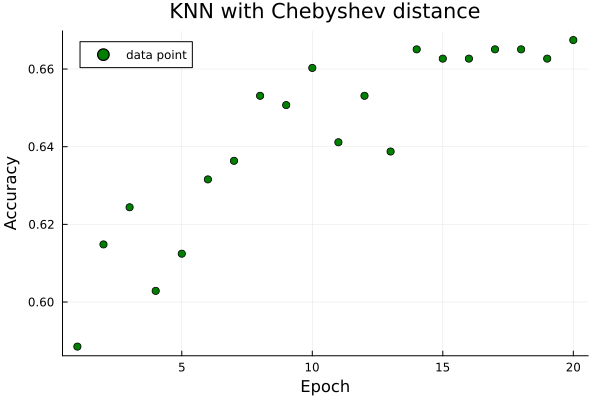

In [10]:
#Run KNN classification using multiple K values and chebyshev distance function 
k_values = Vector{Int64}(undef, 20)
accs_values = Vector{Float64}(undef, 20)

for cur_k in 1:20
    _, acc_val = predict(cur_k, "chebyshev")
    k_values[cur_k] = cur_k
    accs_values[cur_k] = acc_val
end

Plots.scatter(k_values, accs_values, xticks=:all, mc=:green, labels="data point", xlabel="Epoch", ylabel="Accuracy", title="KNN with Chebyshev distance")

## Logistic regression

In [11]:
train_x, train_y = get_train_features()
test_x, test_y = get_test_features()

([3.0 1.0 … 1.0 1.0; 3.0 2.0 … 2.0 2.0; … ; 3.0 1.0 … 2.0 1.0; 3.0 1.0 … 3.0 3.0], [0, 1, 0, 0, 1, 1, 0, 1, 1, 0  …  1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

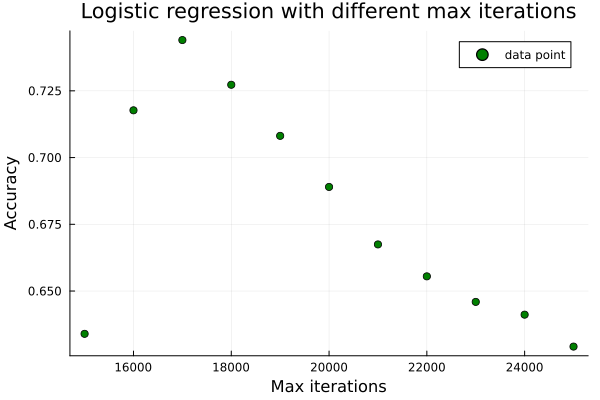

In [12]:
iterations = collect(15000:1000:25000)
learning_rate = 0.0001
accs = Vector{Float64}(undef, length(iterations))

for i in eachindex(iterations)
    max_iter = iterations[i]
    accs[i] = run_lr_on_titanic(maxiter=max_iter, lr=learning_rate)
end

Plots.scatter(iterations, accs, mc=:green, labels="data point", xlabel="Max iterations", ylabel="Accuracy", title="Logistic regression with different max iterations")